In [117]:
# Title:     HousePy_Group5_V1
# Authors:   Aline J
# Date:      09/07/19
# Goal:      Analysis of the housing market in the Houston Area from 2015-2017
# Questions: 

### Begins Here ####
# 1. Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import string as string


# 2. Import Raw data file into a data frame
csv_path = "Data/Housepy_raw.csv"
housepyraw_df = pd.read_csv(csv_path)
#housepyraw_df.head()
housepyraw_df.columns

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['MLS Number', 'Property Type', 'Status', 'Street Number', 'Street Name',
       'Unit Number', 'City/Location', 'Zip Code', 'County', 'List Price',
       'Close Price', 'Close Date', 'Area', 'Subdivision',
       'Master Planned Community', 'Market Area', 'School District',
       'School Elementary', 'School Middle', 'School High', 'Sq Ft Total',
       'Price Sq Ft List', 'Price Sq Ft Sold', 'Lot Size', 'Acres',
       'Price Acre List', 'Price Acre Sales', 'Year Built', 'Bedrooms',
       'Baths Full', 'Baths Half', 'Baths Total', 'Room Count',
       'Fireplaces Number', 'Stories', 'New Construction',
       'New Construction Desc', 'Pool Private', 'No Of Garage Cap', 'Style',
       'DOM', 'CDOM', 'List Office MLSID', 'List Office Name',
       'List Agent MLSID', 'List Agent Full Name', 'Selling Office MLSID',
       'Selling Office Name', 'Selling Agent MLSID', 'Selling Agent Full Name',
       'Realist Owner Name', 'Last Change Timestamp', 'List Date '],
      dtype='ob

In [118]:
#3. Subset dataframe: Dropping columns that wont be used to tell us anything
#housepy_df = housepyraw_df[["MLS Number", "Street Number", "Street Name", "City/Location", "Zip Code", "List Price",
#                           "Close Price", "Close Date", "Area", "Subdivision", "Market Area", "School District",
#                          "School Elementary", "School Middle", "School High", "Sq Ft Total", "Price Sq Ft Sold", "Lot Size",
#                         "Year Built", "Bedrooms", "Baths Total", "New Construction", "Pool Private", "No Of Garage Cap",
#                         "Style", "CDOM"]]
#housepy_df.head()
#"Price Sq Ft Sold", "New Construction", "Pool Private",

# ALine's_Note: I removed non numeric columns from ELizabeth's dataframe to facilitate data cleaning
housepy_df = housepyraw_df[["List Price", "Close Price","CDOM"]]

housepy_df.head()

,List Price,Close Price,CDOM
0,"$44,500","$44,500",81
1,"$65,000","$60,000",19
2,"$90,000","$78,500",70
3,"$85,900","$85,000",40
4,"$105,000","$94,000",98


In [119]:
# 4. Identify data types 
housepy_df.dtypes
# 5. Replace $ from column
housepy_df['Close Price'] = housepy_df['Close Price'].apply(lambda x: x.replace("$", ""))
housepy_df['Close Price'] = housepy_df['Close Price'].apply(lambda x: x.replace(",", ""))
housepy_df['Close Price'] = housepy_df['Close Price'].astype(int)
housepy_df['List Price'] = housepy_df['List Price'].apply(lambda x: x.replace("$", ""))
housepy_df['List Price'] = housepy_df['List Price'].apply(lambda x: x.replace(",", ""))
housepy_df['List Price'] = housepy_df['List Price'].astype(int)
#housepy_df['Price Sq Ft Sold'] = housepy_df['Price Sq Ft Sold'].apply(lambda x: x.replace("$", ""))
#housepy_df['Price Sq Ft Sold'] = housepy_df['Price Sq Ft Sold'].apply(lambda x: x.replace(".", ""))
#housepy_df['Price Sq Ft Sold'] = housepy_df['Price Sq Ft Sold'].astype(int)

housepy_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

,List Price,Close Price,CDOM
0,44500,44500,81
1,65000,60000,19
2,90000,78500,70
3,85900,85000,40
4,105000,94000,98


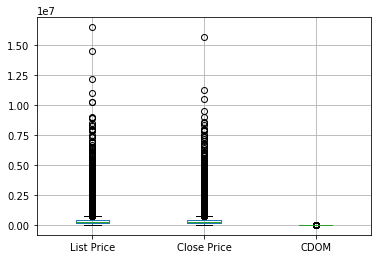

In [120]:
# Exploratory plots
# Boxplot to depict groups of numerical data
import seaborn as sns
boxplot = housepy_df.boxplot(column=['List Price', 'Close Price', 'CDOM'])

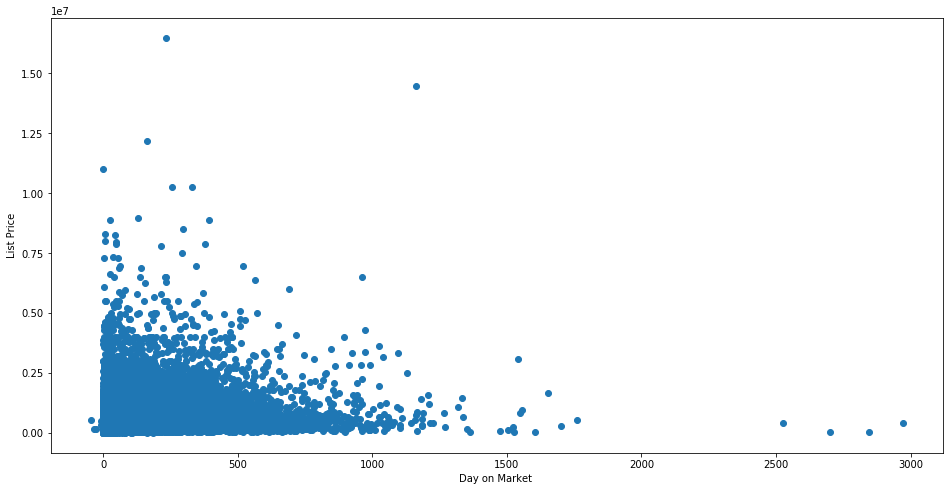

In [121]:
# Exploratory scatter plot
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(housepy_df['CDOM'], housepy_df['List Price'])
ax.set_xlabel('Day on Market ')
ax.set_ylabel('List Price')
plt.show()

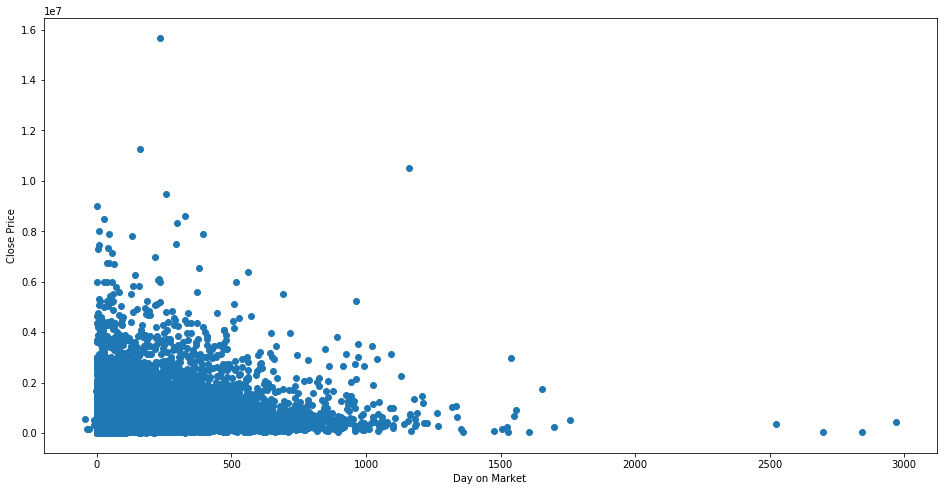

In [122]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(housepy_df['CDOM'], housepy_df['Close Price'])
ax.set_xlabel('Day on Market ')
ax.set_ylabel('Close Price')
plt.show()

In [123]:
# 4. CLEANING DATA

# Descriptive statistics 
housepy_df.describe()



,List Price,Close Price,CDOM
count,9.181500e+04,9.181500e+04,91815.000000
mean,3.647951e+05,3.523869e+05,72.177890
std,4.364511e+05,4.116563e+05,109.472827
min,1.000000e+00,1.250000e+03,-45.000000
25%,1.600000e+05,1.590000e+05,9.000000
50%,2.300000e+05,2.250000e+05,30.000000
75%,3.999000e+05,3.899000e+05,91.000000
max,1.649000e+07,1.568000e+07,2971.000000


In [124]:
#housepy_df.dtypes
# -----------------------------------------------
# Detecting Outliers: Z-Score
# The Z-score is the signed number of standard deviations by which the value of an observation or data point is 
# above the mean value of what is being observed or measured.
# Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the 
# group of data points. Z-score is finding the distribution of data where mean is 0 and standard deviation 
# is 1 i.e. normal distribution.
# -----------------------------------------------
z = np.abs(stats.zscore(housepy_df))
print(z)



[[0.73386643 0.74792644 0.08058765]
 [0.68689642 0.71027346 0.48576603]
 [0.62961592 0.66533281 0.01989445]
 ...
 [4.31941927 4.60972775 0.34874498]
 [5.56813417 5.36521651 1.75224446]
 [8.21449326 8.2535642  0.14453081]]


In [125]:
# Detecting outliers by defining a threshold to identify an outlier.
tre1 = 10
print(np.where(z > 10))

(array([  372,   372,  1981,  1981,  2488,  2851,  4524,  4840,  5478,
        6123,  7254,  7254,  8042,  8042,  8714,  8715,  8935,  8935,
        9357,  9804, 10058, 10058, 10403, 12785, 12785, 14657, 14657,
       15003, 15003, 15114, 15939, 15939, 15940, 15940, 17822, 17822,
       18020, 19771, 19771, 20735, 21283, 21283, 26406, 26901, 26901,
       27428, 28313, 28748, 29081, 29081, 29521, 29760, 30999, 31011,
       31012, 31012, 33089, 33089, 35679, 35679, 35920, 35920, 36762,
       36762, 37127, 37127, 38413, 38413, 39444, 39444, 39445, 39445,
       40301, 40301, 41028, 41028, 42091, 42385, 42385, 42947, 42947,
       43301, 43302, 43302, 46096, 46889, 46889, 47255, 47255, 48888,
       48888, 48931, 49687, 50105, 50105, 50721, 50721, 51326, 51326,
       52179, 52179, 52248, 52248, 52371, 52371, 53737, 53737, 53820,
       53852, 53852, 56969, 57799, 57799, 57956, 58121, 59095, 59095,
       59164, 59466, 59466, 63279, 63279, 63635, 63635, 65479, 65479,
       66822, 66822

In [126]:
# Removing outliers
housepy_df_o= housepy_df[(z < 3).all(axis=1)]

In [127]:
# Explanation: The first array contains the list of row numbers and second array respective column numbers, which mean z[55][1] have a Z-score higher than 10.
# See example:
print(z[55][1])

type(housepy_df)
##Output cleaned data to csv
#housepy_df.to_csv("housepy_cleaned.csv", index=False, header=True)

1.0008721318959724


pandas.core.frame.DataFrame

In [129]:
# IQR score
Q1 = housepy_df.quantile(0.25)
Q3 = housepy_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


List Price     239900.0
Close Price    230900.0
CDOM               82.0
dtype: float64


In [74]:
print(housepy_df < (Q1 - 1.5 * IQR)) |(housepy_df > (Q3 + 1.5 * IQR))

       List Price  Close Price   CDOM
0           False        False  False
1           False        False  False
2           False        False  False
3           False        False  False
4           False        False  False
5           False        False  False
6           False        False  False
7           False        False  False
8           False        False  False
9           False        False  False
10          False        False  False
11          False        False  False
12          False        False  False
13          False        False  False
14          False        False  False
15          False        False  False
16          False        False  False
17          False        False  False
18          False        False  False
19          False        False  False
20          False        False  False
21          False        False  False
22          False        False  False
23          False        False  False
24          False        False  False
25          

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [105]:
# Removing Outliers
housepy_df_o = housepy_df[(z < 5).all(axis=1)]
housepy_df_o.shape
#housepy_df.shape

(90755, 3)

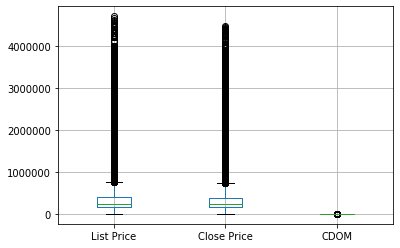

In [130]:
# See new box plots
boxplot = housepy_df_o.boxplot(column=['List Price', 'Close Price', 'CDOM'])

In [133]:
housepy_df_out = housepy_df[~((housepy_df < (Q1 - 1.5 * IQR)) |(housepy_df > (Q3 + 1.5 * IQR))).any(axis=1)]
housepy_df_out.shape

(77601, 3)

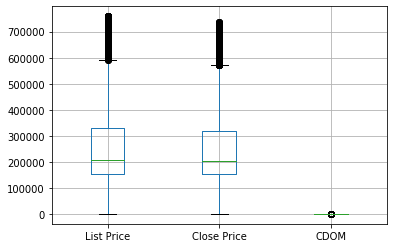

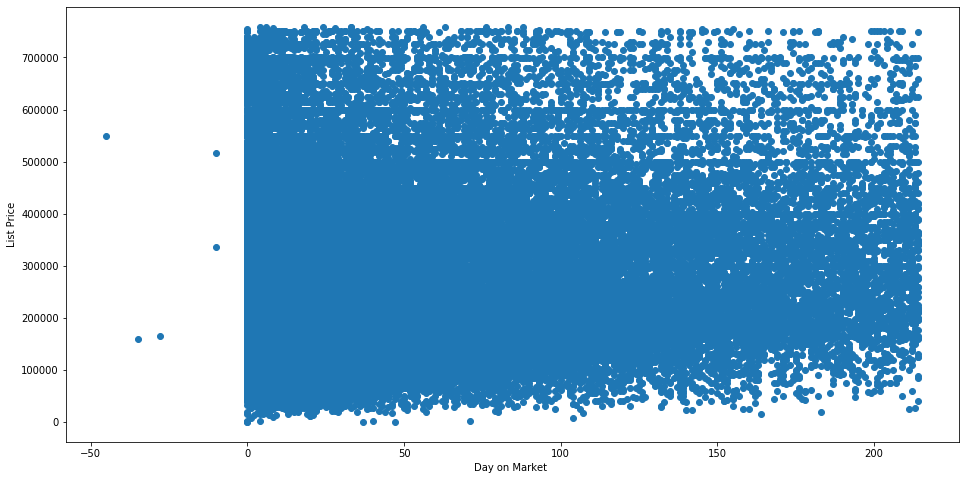

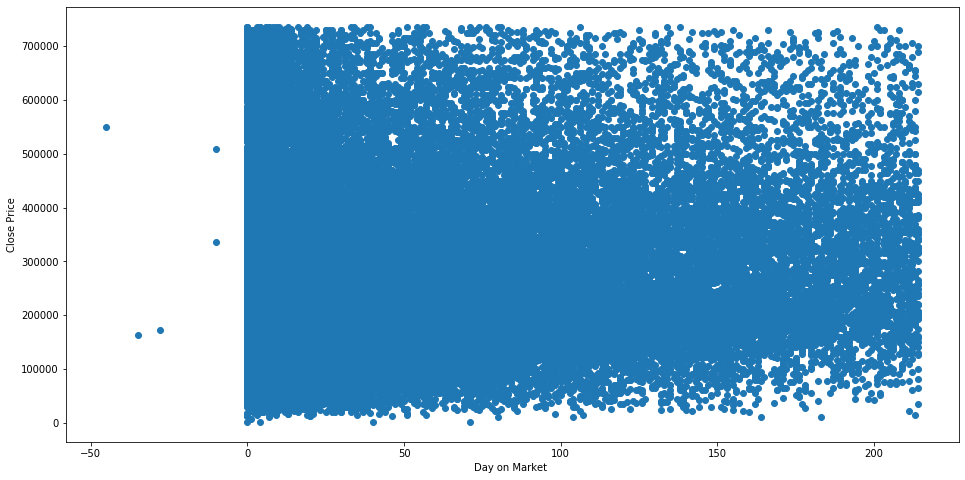

In [135]:
# See new box plots
boxplot2 = housepy_df_out.boxplot(column=['List Price', 'Close Price', 'CDOM'])
# Exploratory scatter plot
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(housepy_df_out['CDOM'], housepy_df_out['List Price'])
ax.set_xlabel('Day on Market ')
ax.set_ylabel('List Price')
plt.show()

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(housepy_df_out['CDOM'], housepy_df_out['Close Price'])
ax.set_xlabel('Day on Market ')
ax.set_ylabel('Close Price')
plt.show()

In [154]:
# CAlCULATIONS
# RANDOM FOREST ANALYSIS
#One-hot encoded categorical variables: # Data Preparation
#Converted to arrays
#Split data into training and testing sets
#-------------------
# Data Preparation
features=housepy_df_out
type(features)
#features.iloc[:,5:].head(5)
features.head(5)
# Labels are the values we want to predict
labels = np.array(features['List Price'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('List Price', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [157]:
# Training and Testing Sets
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 100)

In [158]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)
#Training Features Shape: (58200, 2)
#Training Labels Shape: (58200,,)
#Testing Features Shape: (19401, 2)
#Testing Labels Shape: (19401,)

Training Features Shape: (58200, 2)
Training Labels Shape: (58200,)
Testing Features Shape: (19401, 2)
Testing Labels Shape: (19401,)


In [159]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('List Price')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))
#Average baseline error:  5.06 degrees.

Average baseline error:  255967.29


In [160]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 100)
# Train the model on training data
rf.fit(train_features, train_labels);

In [161]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
#Mean Absolute Error: 8512.05 degrees

Mean Absolute Error: 8512.05 degrees.


In [162]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
Accuracy: 95.96 %.
    # That looks pretty good! Our model has learned how to predict the List price as a function of list and close price in Houston with 95.96% accuracy.

Accuracy: 95.96 %.


In [169]:
#conda install GraphViz

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - graphviz


The following NEW packages will be INSTALLED:

  graphviz           pkgs/main/win-64::graphviz-2.38-hfd603c8_2

The following packages will be UPDATED:

  conda                                       4.7.10-py37_0 --> 4.7.11-py37_0


Preparing transaction: ...working... done
Verifying transaction: ...working... failed

Note: you may need to restart the kernel to use updated packages.



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3




In [170]:

# Import tools needed for visualization
#from sklearn.tree import export_graphviz
#import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
#from sklearn.tree import export_graphviz
#import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

NameError: name 'pydot' is not defined

In [171]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Close Price          Importance: 1.0
Variable: CDOM                 Importance: 0.0


In [174]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=100)
# Extract the two most important features
important_indices = [feature_list.index('Close Price'), feature_list.index('CDOM')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

#Note:
#This tells us that we actually do not need all the data we collected to make accurate predictions! If we were to continue using this model, we could only collect the two variables and achieve nearly the same performance.


Mean Absolute Error: 8512.05 degrees.
Accuracy: 95.96 %.


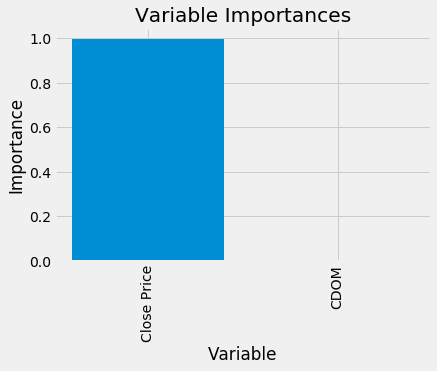

In [175]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
#import matplotlib.pyplot as plt
#%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [ ]:
# Use datetime for creating date objects for plotting
import datetime
# Dates of training values
months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]
# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})
# Dates of predictions
months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]
# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]
# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})
# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()
# Graph labels
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');

In [ ]:
# Make the data accessible for plotting
true_data['temp_1'] = features[:, feature_list.index('temp_1')]
true_data['average'] = features[:, feature_list.index('average')]
true_data['friend'] = features[:, feature_list.index('friend')]
# Plot all the data as lines
plt.plot(true_data['date'], true_data['actual'], 'b-', label  = 'actual', alpha = 1.0)
plt.plot(true_data['date'], true_data['temp_1'], 'y-', label  = 'temp_1', alpha = 1.0)
plt.plot(true_data['date'], true_data['average'], 'k-', label = 'average', alpha = 0.8)
plt.plot(true_data['date'], true_data['friend'], 'r-', label = 'friend', alpha = 0.3)
# Formatting plot
plt.legend(); plt.xticks(rotation = '60');
# Lables and title
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual Max Temp and Variables');

In [ ]:
#### CALCULATIONS #####
# 1. Creating the total sold column alerts us that there are areas with nothing sold or a blank in the dataset

dict_list = []
for market in housepy_df["Market Area"].unique().tolist():
    temp_dict = {"Market Area": housepy_df.loc[housepy_df["Market Area"]==market]["Market Area"].max(), 
                "Sold Price": housepy_df.loc[housepy_df["Market Area"]==market]["Close Price"].median(),
                "Total Sold": len(housepy_df.loc[housepy_df["Market Area"]==market])} 
    
    dict_list.append(temp_dict)
MarketSummary = pd.DataFrame(dict_list)
MarketSummary
